In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('binary_classification_dataset.csv')

In [3]:
df

,feature1,feature2,label
0,-1.173104,0.258830,0
1,0.844000,0.936451,1
2,0.590231,-0.448608,0
3,1.222412,1.387470,1
4,-0.509876,0.280590,0
...,...,...,...
995,1.593129,0.459142,1
996,-0.376295,0.153755,0
997,-0.553224,0.433907,0
998,0.054917,1.178184,1


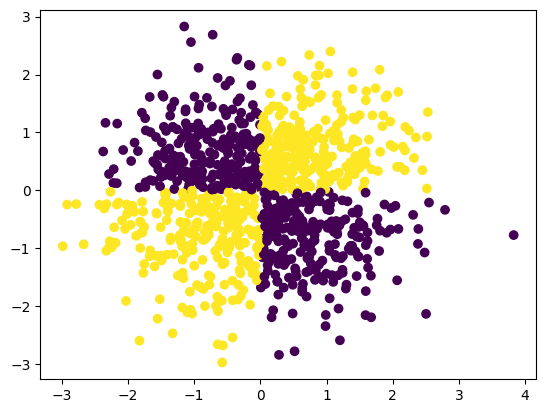

In [6]:
plt.scatter(df['feature1'],df['feature2'],c=df['label'])
plt.show()

In [4]:
x = df.iloc[:,:-1]
x

,feature1,feature2
0,-1.173104,0.258830
1,0.844000,0.936451
2,0.590231,-0.448608
3,1.222412,1.387470
4,-0.509876,0.280590
...,...,...
995,1.593129,0.459142
996,-0.376295,0.153755
997,-0.553224,0.433907
998,0.054917,1.178184


In [5]:
y = df['label']
y

0      0
1      1
2      0
3      1
4      0
      ..
995    1
996    0
997    0
998    1
999    0
Name: label, Length: 1000, dtype: int64

In [6]:
import tensorflow
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim = 2))
model.add(Dense(1,activation = 'sigmoid'))

C:\Program Files\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Stochastic Gradient Descent

In [9]:
from keras.optimizers import SGD

In [11]:
optimizer = SGD(learning_rate = 0.01)

In [29]:
model.compile(optimizer = optimizer ,loss= 'binary_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(x,y,epochs = 200 ,validation_split = 0.2 )

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9900 - loss: 0.1463 - val_accuracy: 0.9950 - val_loss: 0.1502
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9887 - loss: 0.1458 - val_accuracy: 0.9950 - val_loss: 0.1497
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9900 - loss: 0.1453 - val_accuracy: 0.9950 - val_loss: 0.1492
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9900 - loss: 0.1449 - val_accuracy: 0.9950 - val_loss: 0.1488
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9900 - loss: 0.1444 - val_accuracy: 0.9950 - val_loss: 0.1483
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9900 - loss: 0.1439 - val_accuracy: 0.9950 - val_loss: 0.1478
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9900 - loss: 0.1434 - val_accuracy: 0.9950 - val_loss: 0.1474
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9887 - loss: 0.1430 - val_accuracy: 0.9

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

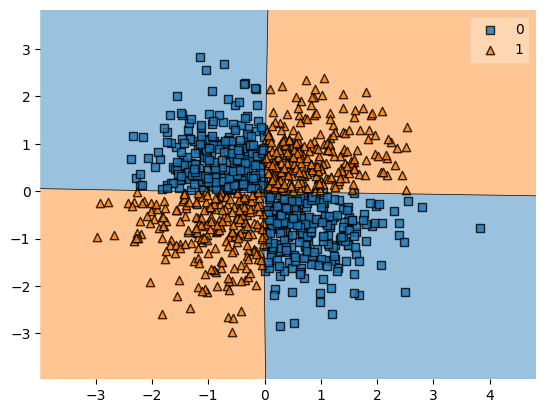

In [32]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values.astype(int),clf=model)

In [33]:
loss, accuracy = model.evaluate(x, y)
print("loss: " , loss )
print("accuracy: " , accuracy )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9920 - loss: 0.0944
loss:  0.09438849240541458
accuracy:  0.9919999837875366


# SGD with momentum

In [34]:
optimizer = SGD(learning_rate = 0.01 , momentum = 0.9 , nesterov = False) # momentum mein jo value hai wo beta ki value set ho gy.

In [35]:
model.compile(optimizer = optimizer ,loss= 'binary_crossentropy',metrics=['accuracy'])

In [36]:
history=model.fit(x,y,epochs = 200 ,validation_split = 0.2 )

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9925 - loss: 0.0934 - val_accuracy: 0.9950 - val_loss: 0.0981
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9925 - loss: 0.0923 - val_accuracy: 0.9950 - val_loss: 0.0973
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9912 - loss: 0.0907 - val_accuracy: 0.9950 - val_loss: 0.0957
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9900 - loss: 0.0896 - val_accuracy: 0.9950 - val_loss: 0.0947
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9912 - loss: 0.0882 - val_accuracy: 0.9950 - val_loss: 0.0926
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9937 - loss: 0.0869 - val_accuracy: 0.9950 - val_loss: 0.0918
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9887 - loss: 0.0863 - val_accuracy: 0.9950 - val_loss: 0.0910
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9925 - loss: 0.0846 - val_accuracy: 1.000

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


<Axes: >

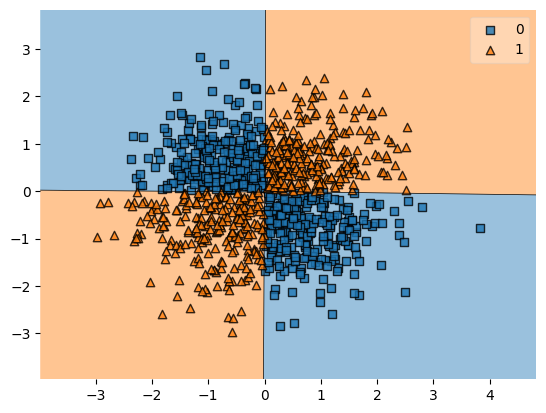

In [37]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values.astype(int),clf=model)

In [38]:
loss, accuracy = model.evaluate(x, y)
print("loss: " , loss )
print("accuracy: " , accuracy )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9950 - loss: 0.0335
loss:  0.033522121608257294
accuracy:  0.9950000047683716


# Nesterov Accelerated Gradient (NAG)

In [39]:
optimizer = SGD(learning_rate = 0.01 , momentum = 0.9 , nesterov = True) # momentum mein jo value hai wo beta ki value set ho gy.


In [40]:
model.compile(optimizer = optimizer ,loss= 'binary_crossentropy',metrics=['accuracy'])

In [41]:
history=model.fit(x,y,epochs = 200 ,validation_split = 0.2 )

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9950 - loss: 0.0333 - val_accuracy: 1.0000 - val_loss: 0.0367
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9950 - loss: 0.0332 - val_accuracy: 1.0000 - val_loss: 0.0366
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9950 - loss: 0.0332 - val_accuracy: 1.0000 - val_loss: 0.0366
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9950 - loss: 0.0331 - val_accuracy: 1.0000 - val_loss: 0.0359
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9950 - loss: 0.0335 - val_accuracy: 1.0000 - val_loss: 0.0362
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9975 - loss: 0.0329 - val_accuracy: 1.0000 - val_loss: 0.0362
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9937 - loss: 0.0330 - val_accuracy: 1.0000 - val_loss: 0.0365
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9962 - loss: 0.0330 - val_accuracy: 1.00

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

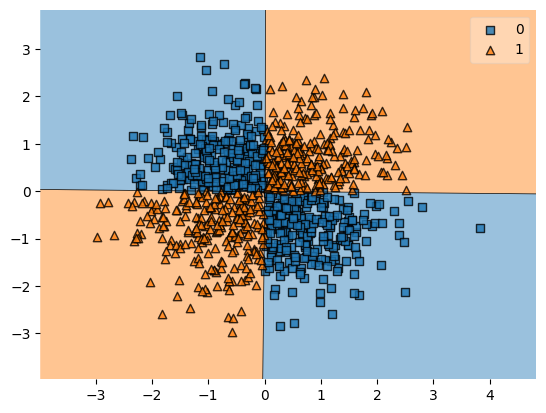

In [42]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values.astype(int),clf=model)

In [43]:
loss, accuracy = model.evaluate(x, y)
print("loss: " , loss )
print("accuracy: " , accuracy )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9990 - loss: 0.0237
loss:  0.023667195811867714
accuracy:  0.9990000128746033


# Adagrad Optimizer

In [8]:
from keras.optimizers import Adagrad

In [10]:
optimizer = Adagrad(learning_rate = 0.01)
model.compile(optimizer = optimizer ,loss= 'binary_crossentropy',metrics=['accuracy'])
history=model.fit(x,y,epochs = 200 ,validation_split = 0.2 )

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6750 - loss: 0.6699 - val_accuracy: 0.8700 - val_loss: 0.6478
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9300 - loss: 0.6290 - val_accuracy: 0.9550 - val_loss: 0.6132
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9700 - loss: 0.5962 - val_accuracy: 0.9750 - val_loss: 0.5844
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9775 - loss: 0.5683 - val_accuracy: 0.9800 - val_loss: 0.5594
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9787 - loss: 0.5440 - val_accuracy: 0.9800 - val_loss: 0.5372
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9825 - loss: 0.5222 - val_accuracy: 0.9800 - val_loss: 0.5172
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9837 - loss: 0.5027 - val_accuracy: 0.9800 - val_loss: 0.4989
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9837 - loss: 0.4848 - val_accuracy: 0.9800 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

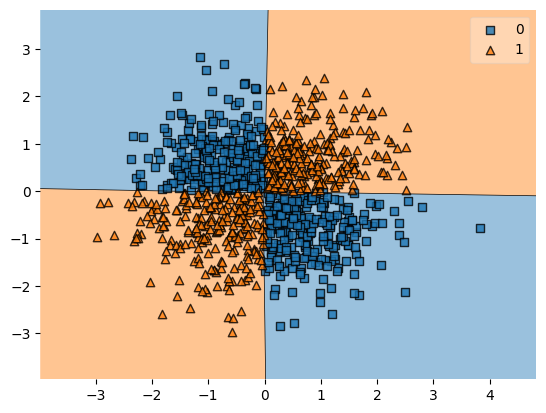

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values.astype(int),clf=model)

In [12]:
loss, accuracy = model.evaluate(x, y)
print("loss: " , loss )
print("accuracy: " , accuracy )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9920 - loss: 0.0981 
loss:  0.09809492528438568
accuracy:  0.9919999837875366


# RMSProp Optimizer

In [14]:
from keras.optimizers import RMSprop
optimizer = RMSprop(learning_rate = 0.01,rho = 0.9) # rho is beta
model.compile(optimizer = optimizer ,loss= 'binary_crossentropy',metrics=['accuracy'])
history=model.fit(x,y,epochs = 200 ,validation_split = 0.2 )

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9750 - loss: 0.1037 - val_accuracy: 0.9950 - val_loss: 0.0867
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9750 - loss: 0.0881 - val_accuracy: 0.9950 - val_loss: 0.0781
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9812 - loss: 0.0791 - val_accuracy: 0.9950 - val_loss: 0.0729
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9775 - loss: 0.0750 - val_accuracy: 0.9950 - val_loss: 0.0671
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9800 - loss: 0.0659 - val_accuracy: 0.9700 - val_loss: 0.0786
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9875 - loss: 0.0619 - val_accuracy: 1.0000 - val_loss: 0.0559
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9875 - loss: 0.0576 - val_accuracy: 0.9850 - val_loss: 0.0597
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9775 - loss: 0.0622 - val_accuracy: 0.9750 - 

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values.astype(int),clf=model)

In [ ]:
loss, accuracy = model.evaluate(x, y)
print("loss: " , loss )
print("accuracy: " , accuracy )

# Adam Optimizer

In [ ]:
from keras.optimizers import RMSprop
optimizer = RMSprop(learning_rate = 0.01,rho = 0.9) # rho is beta
model.compile(optimizer = optimizer ,loss= 'binary_crossentropy',metrics=['accuracy'])
history=model.fit(x,y,epochs = 200 ,validation_split = 0.2 )